# Ultimate Take Home Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from pandas.io.json import json_normalize
import seaborn as sns
import json

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the json file as a dataframe
login_df = pd.read_json('logins.json')
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df_login = pd.DataFrame(pd.to_datetime(login_df['login_time']),columns=['login_time'])
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df_login.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


## Part 1: Exploratory Data Analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15 minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [6]:
#start resample and add a count column to create the graph
df_login['count'] = 1
df_login.index = df_login['login_time']
df_login.drop('login_time',axis=1,inplace=True)

In [7]:
df_login.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


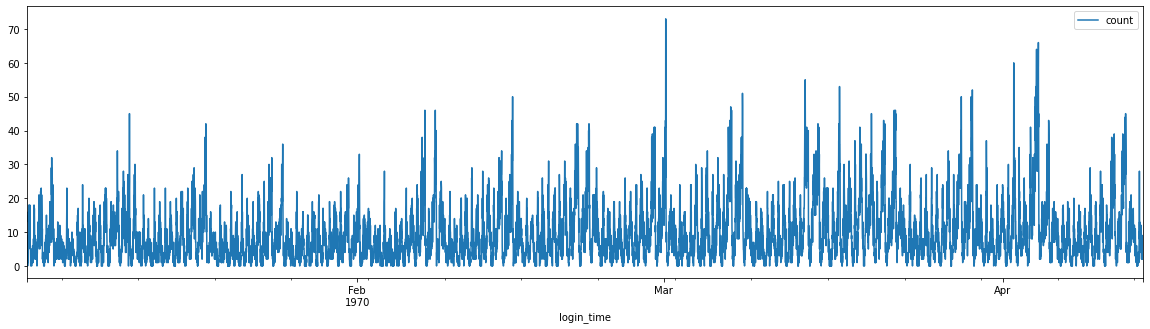

In [8]:
#resample and plot
df_resample = df_login.resample('15T').sum()
df_resample.plot(kind='line', figsize=(20,5))
plt.show()

In [9]:
df_resample.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


There is a sinusoidal distribution of logins, with most of them being in March

In [10]:
#plot by day
df_byday = df_login.resample('1D').sum()

In [11]:
df_byday.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


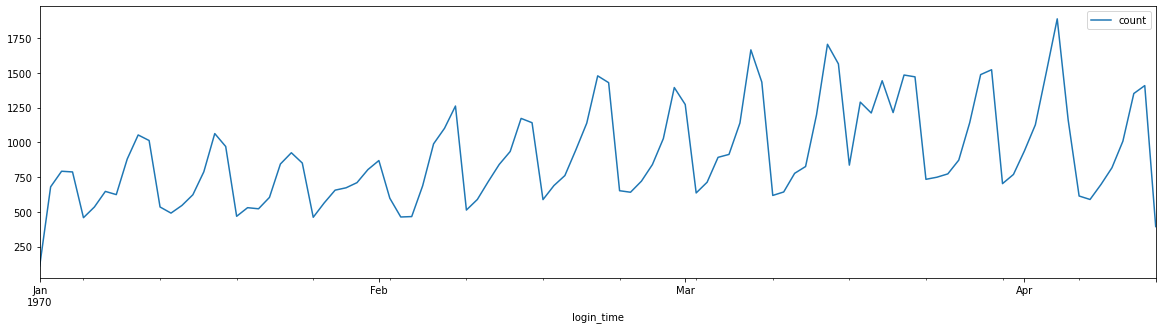

In [12]:
df_byday.plot(kind='line', figsize=(20,5))

When we observe the pattern of logins resampled by a day, we can see that there is an increase in logins as the months go on, with one slight decrease in mid-March

In [13]:
by_week_df = df_login.resample('7D').sum()
by_week_df.head()

,count
login_time,
1970-01-01,4017
1970-01-08,5149
1970-01-15,4971
1970-01-22,4912
1970-01-29,4590


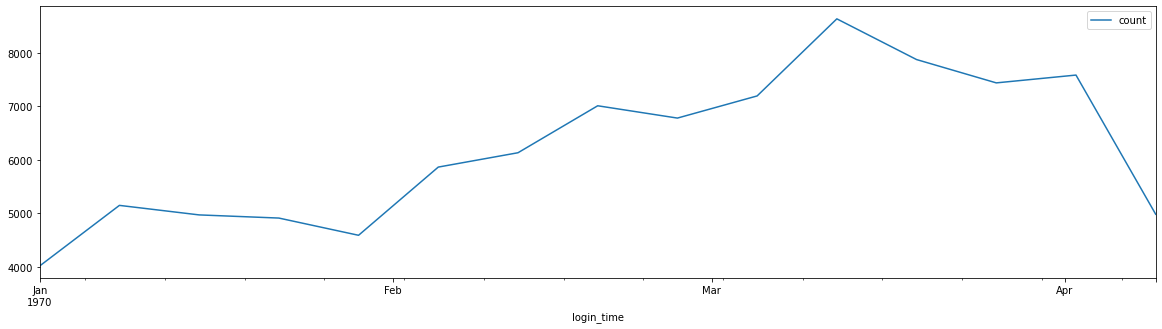

In [14]:
by_week_df.plot(kind='line', figsize=(20,5))

## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

In order to track the success of the experiment, I would make sure that the drivers' routes are tracked through the service's apps and we would need to account for the toll prices as well. Weekdays seem to have the most drivers actively working, so it doesn't seem that tolls are utilized as heavily on weekdays as they are on weekends. 

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
       a. how you will implement the experiment
       b. what statistical test(s) you will conduct to verify the significance of the
observation
       c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

    a. First, as stated above, I would make sure that the drivers' routes are tracked and map out how their drives are different on weekdays as opposed to weekends and I'd find patterns as to which towns and cities are travelled to most and if there was a toll taken, so we can implement statistical analyses
    b-c. When it comes to statistical analysis, I would probably perform a t-test since it can handle a large dataset, we can split the data into weekend and weekday and compare the trips taken back and forth

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.


1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

In [15]:
with open('./ultimate_data_challenge.json') as eda:
    eda_data = json.load(eda)

In [16]:
df_ultimate = pd.DataFrame(eda_data)
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [17]:
df_ultimate.shape

(50000, 12)

In [18]:
df_ultimate['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [19]:
df_ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [20]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [21]:
df_ultimate['trips_in_first_30_days'].unique()

array([  4,   0,   3,   9,  14,   2,   1,   6,  24,   5,   7,  11,  73,
         8,  10,  22,  15,  13,  17,  20,  12,  42,  27,  26,  18,  16,
        40,  28,  19,  23,  33,  48,  31,  71,  25,  21,  34,  29,  30,
        32,  47,  37,  53,  43,  44,  38,  39,  49,  55, 125,  41,  50,
        63,  35,  54,  56,  36,  51,  58], dtype=int64)

In [22]:
#check for null values
print(df_ultimate.isna().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


In [23]:
df_ultimate['avg_rating_of_driver'].unique()

array([4.7, 5. , 4.3, 4.6, 4.4, 3.5, nan, 4.5, 4. , 3.9, 4.9, 4.8, 2.5,
       3.7, 1. , 4.1, 4.2, 3. , 3.8, 2. , 2.7, 3.3, 2.8, 3.6, 3.4, 3.2,
       2.6, 3.1, 2.9, 1.7, 1.8, 1.5, 2.3, 1.9, 2.1, 2.4, 1.6, 2.2])

In [24]:
df_ultimate['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

In [25]:
mean_driver_rating = np.mean(df_ultimate['avg_rating_of_driver'])

In [26]:
#fill nan values of mean driver rating with the mean of the ratings for the drivers
df_ultimate['avg_rating_of_driver']=df_ultimate['avg_rating_of_driver'].fillna(mean_driver_rating)

In [27]:
#get mean to fill nan values of avg_by_driver with
mean_passenger_rating = np.mean(df_ultimate['avg_rating_by_driver'])

In [28]:
df_ultimate['avg_rating_by_driver'] = df_ultimate['avg_rating_by_driver'].fillna(mean_passenger_rating)

In [29]:
print(df_ultimate.isna().sum())

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
dtype: int64


In [30]:
#drop the columns where phone is nan
df_ultimate = df_ultimate.drop(df_ultimate[df_ultimate.phone.isna()==True].index,axis=0)

In [31]:
print(df_ultimate.isna().sum())

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


In [32]:
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [33]:
#let's deal with qualitative data, first let's see if the driver have been active
#start by finding the most recent date
most_recent = df_ultimate['last_trip_date'].max()

In [34]:
type(most_recent)

str

In [35]:
type(df_ultimate['last_trip_date'][0])

str

In [36]:
#convert strings to datetime
most_recent = pd.to_datetime(most_recent)

In [37]:
df_ultimate['last_trip_date'] = pd.to_datetime(df_ultimate['last_trip_date'])

In [38]:
type(df_ultimate['last_trip_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [39]:
#a driver is considered active if they've driven in the last 30 days lets find out if someone has been active 
#0: inactive and 1: active, add a new column if the driver is active
df_ultimate['is_active'] = df_ultimate['last_trip_date'].apply(lambda date: 1 if (most_recent - date).days < 30 else 0)

In [40]:
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [41]:
df_ultimate['is_active'].value_counts()

0    31424
1    18180
Name: is_active, dtype: int64

In [42]:
inactive, active = df_ultimate['is_active'].value_counts()

In [43]:
active_driver_ratio = ((active/(active+inactive))*100)
print('The percentage of drivers who are still active is about',active_driver_ratio, '%')

The percentage of drivers who are still active is about 36.65027013950488 %


In [44]:
#change phone data to dummy variables
phone_dummies = pd.get_dummies(df_ultimate['phone'])
phone_dummies

,Android,iPhone
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
49995,0,1
49996,0,1
49997,1,0
49998,0,1


In [45]:
df_ultimate = pd.concat([df_ultimate, phone_dummies], axis=1)
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_active,Android,iPhone
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,1,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,1,0


In [46]:
#get dummy variables for the rest of the categorical variable
df_city_dummies = pd.get_dummies(df_ultimate['city'])

In [47]:
df_ultimate = pd.concat([df_ultimate, df_city_dummies], axis=1)
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_active,Android,iPhone,Astapor,King's Landing,Winterfell
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,0,1,0,1,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,1,0,1,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0,1,1,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,0,1,0,1,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,1,0,0,0,1


In [48]:
df_ult_dummies = pd.get_dummies(df_ultimate['ultimate_black_user'])

In [49]:
df_ult_dummies.head()

,False,True
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [50]:
df_ult_dummies.columns = ['ultimate_black_user', 'not_ultimate_black_user']

In [51]:
df_ult_dummies

,ultimate_black_user,not_ultimate_black_user
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
49995,1,0
49996,1,0
49997,0,1
49998,1,0


In [52]:
df_ultimate = pd.concat([df_ultimate, df_ult_dummies], axis=1)
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_active,Android,iPhone,Astapor,King's Landing,Winterfell,ultimate_black_user,not_ultimate_black_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,0,1,0,1,0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,1,0,1,0,0,1,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0,1,1,0,0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,0,1,0,1,0,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,1,0,0,0,1,1,0


In [53]:
#drop qualitative columns
df_ultimate = df_ultimate.drop(['city', 'phone', 'ultimate_black_user'], axis=1)
df_ultimate.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,is_active,Android,iPhone,Astapor,King's Landing,Winterfell,not_ultimate_black_user
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,0,1,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,1,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,0,1,1,0,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,1,0,0,0,1,0


## Visualization and EDA

In [54]:
# get separate datasets for active and inactive drivers
df_active = df_ultimate[df_ultimate['is_active']==1]

In [55]:
df_active.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,is_active,Android,iPhone,Astapor,King's Landing,Winterfell,not_ultimate_black_user
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,0,1,0,1,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,1,0,1
5,2,2014-01-09,3.5,1.00,2014-06-06,0.0,100.0,10.56,5.0,1,0,1,0,0,1,1
13,0,2014-01-29,4.0,1.38,2014-06-08,50.0,50.0,3.04,5.0,1,0,1,0,1,0,0
16,1,2014-01-11,5.0,1.00,2014-06-28,0.0,50.0,10.86,3.0,1,1,0,0,1,0,1


In [56]:
df_inactive = df_ultimate[df_ultimate['is_active']==0]
df_inactive.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,is_active,Android,iPhone,Astapor,King's Landing,Winterfell,not_ultimate_black_user
1,0,2014-01-29,5.000000,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,1,0,0,0
2,3,2014-01-06,4.300000,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,0,1,1,0,0,0
4,14,2014-01-27,4.400000,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,1,0,0,0,1,0
6,1,2014-01-24,4.601559,1.00,2014-01-25,0.0,100.0,3.95,4.0,0,1,0,1,0,0,0
7,2,2014-01-28,5.000000,1.00,2014-01-29,0.0,100.0,2.04,5.0,0,0,1,0,0,1,0


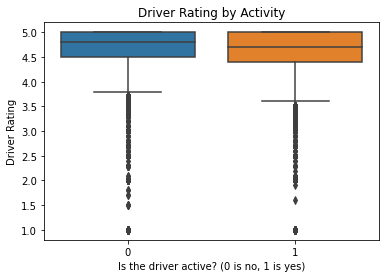

In [57]:
sns.boxplot(data=df_ultimate, x='is_active', y='avg_rating_of_driver')
plt.xlabel('Is the driver active? (0 is no, 1 is yes)')
plt.ylabel('Driver Rating')
plt.title('Driver Rating by Activity')
plt.show()

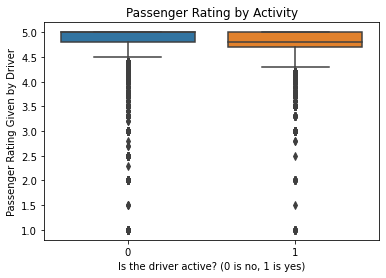

In [58]:
sns.boxplot(data=df_ultimate, x='is_active', y='avg_rating_by_driver')
plt.xlabel('Is the driver active? (0 is no, 1 is yes)')
plt.ylabel('Passenger Rating Given by Driver')
plt.title('Passenger Rating by Activity')
plt.show()

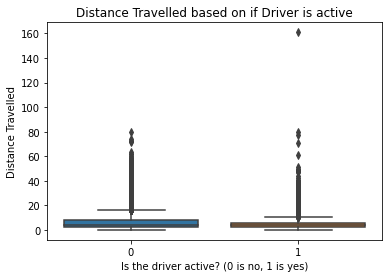

In [59]:
sns.boxplot(data=df_ultimate, x='is_active', y='avg_dist')
plt.xlabel('Is the driver active? (0 is no, 1 is yes)')
plt.ylabel('Distance Travelled')
plt.title('Distance Travelled based on if Driver is active')
plt.show()

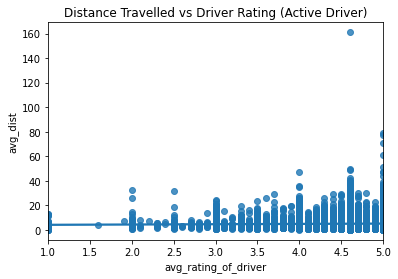

In [60]:
sns.regplot(x=df_active['avg_rating_of_driver'], y=df_active['avg_dist'])
plt.title('Distance Travelled vs Driver Rating (Active Driver)')
plt.show()

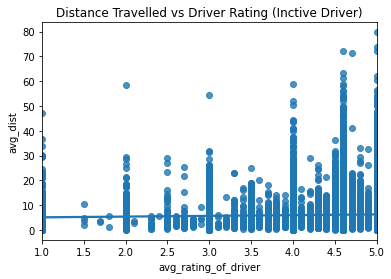

In [61]:
sns.regplot(x=df_inactive['avg_rating_of_driver'], y=df_inactive['avg_dist'])
plt.title('Distance Travelled vs Driver Rating (Inctive Driver)')
plt.show()

The drivers who are currently inactive have travelled a higher distance, and their star rating affects the distance they drive, if they're rated low, they do not drive as much as those who are rated higher.

In [62]:
#create predictive models
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [63]:
#Create feature/target variables
X = df_ultimate.drop(columns = ['is_active', 'signup_date', 'last_trip_date'])
y = df_ultimate['is_active']

In [64]:
#perform train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42, stratify=y)

In [65]:
#scale the data
scaler = QuantileTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
#perform logistic regression
logreg = LogisticRegression()
# fit the model
logreg.fit(X_train, y_train)
# create prediction variable
y_pred = logreg.predict(X_test)
# print cross_val_score
print(accuracy_score(y_test, y_pred))

0.7544288332315211


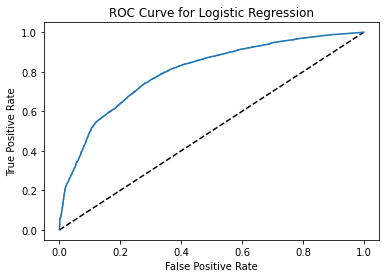

In [67]:
#create roc curve
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()

In [68]:
classification_report_logreg = classification_report(y_test, y_pred)
print(classification_report_logreg)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     10370
           1       0.71      0.56      0.63      6000

    accuracy                           0.75     16370
   macro avg       0.74      0.71      0.72     16370
weighted avg       0.75      0.75      0.75     16370



In [69]:
#random forest
rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [70]:
classification_report_rf = classification_report(y_test, rf_pred)
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     10370
           1       0.68      0.66      0.67      6000

    accuracy                           0.76     16370
   macro avg       0.74      0.74      0.74     16370
weighted avg       0.76      0.76      0.76     16370



In [71]:
print(accuracy_score(y_test, rf_pred))

0.7625534514355529


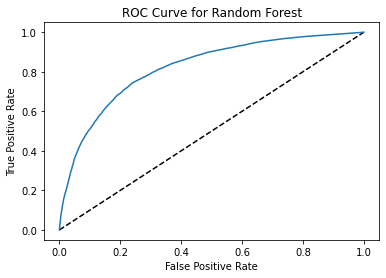

In [72]:
#create roc curve
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

## Hyperparameter Tuning

In [73]:
clf_params = LogisticRegression()
C_params = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'C': C_params}

In [74]:
logreg_hyperparam = GridSearchCV(logreg, param_grid, cv=5)

logreg_hyperparam.fit(X,y)

print("Tuned Logistic Regression Parameters: ",logreg_hyperparam.best_params_) 
print("Best score is ", logreg_hyperparam.best_score_)

Tuned Logistic Regression Parameters:  {'C': 0.01}
Best score is  0.7251029361796906


In [75]:
'''#random forest hyperparam tuning
rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)'''
#hyperparam tuning is not working fast enough, for rf, so I am skipping entirely

'#random forest hyperparam tuning\nrf = RandomForestClassifier(max_features=\'auto\',random_state=1, n_jobs=-1)\n\nparam_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}\n\ngs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=\'accuracy\', cv=3, n_jobs=-1)\n\ngs = gs.fit(X_train, y_train)\n\nprint(gs.best_estimator_) \nprint(gs.best_score_)'

In [76]:
#feature engineering/importance
from xgboost import XGBClassifier

In [77]:
#new train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)
model = XGBClassifier()
model.fit(X_train, y_train)

[15:30:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

TypeError: 'NoneType' object is not callable